# TODO Needs Comments


In [1]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import io
from skimage import color
import napari

mpl.rcParams['figure.dpi'] = 300

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"

def minmax(img):
    return (img-img.min())/(img.max() - img.min())

viewer = napari.Viewer()

In [2]:
hour = 48

masks_loc = home_directory + f"/image_data/Processed Data/Masks Brightfield/{hour}h"
btf_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brightfield"
bra_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames = {}
filenames[hour] = pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

images = {
    "masks":np.array(mask_collection),
    "btf": np.array(btf_collection),
    "bra": np.array(bra_collection),
}

    
cropped_images_btf = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["btf"],images["masks"])])
cropped_images_bra = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["bra"],images["masks"])])


viewer.add_image(np.array([minmax(crop_img) for crop_img in cropped_images_btf]),name = "BF",)
viewer.add_image(cropped_images_bra,name = "BRA",blending="additive",contrast_limits=[5,80],colormap="red")

<Image layer 'BRA' at 0x21404205a90>

# ADJUST CONTRAST LIMITS AND OPACITY OF BF IMAGE

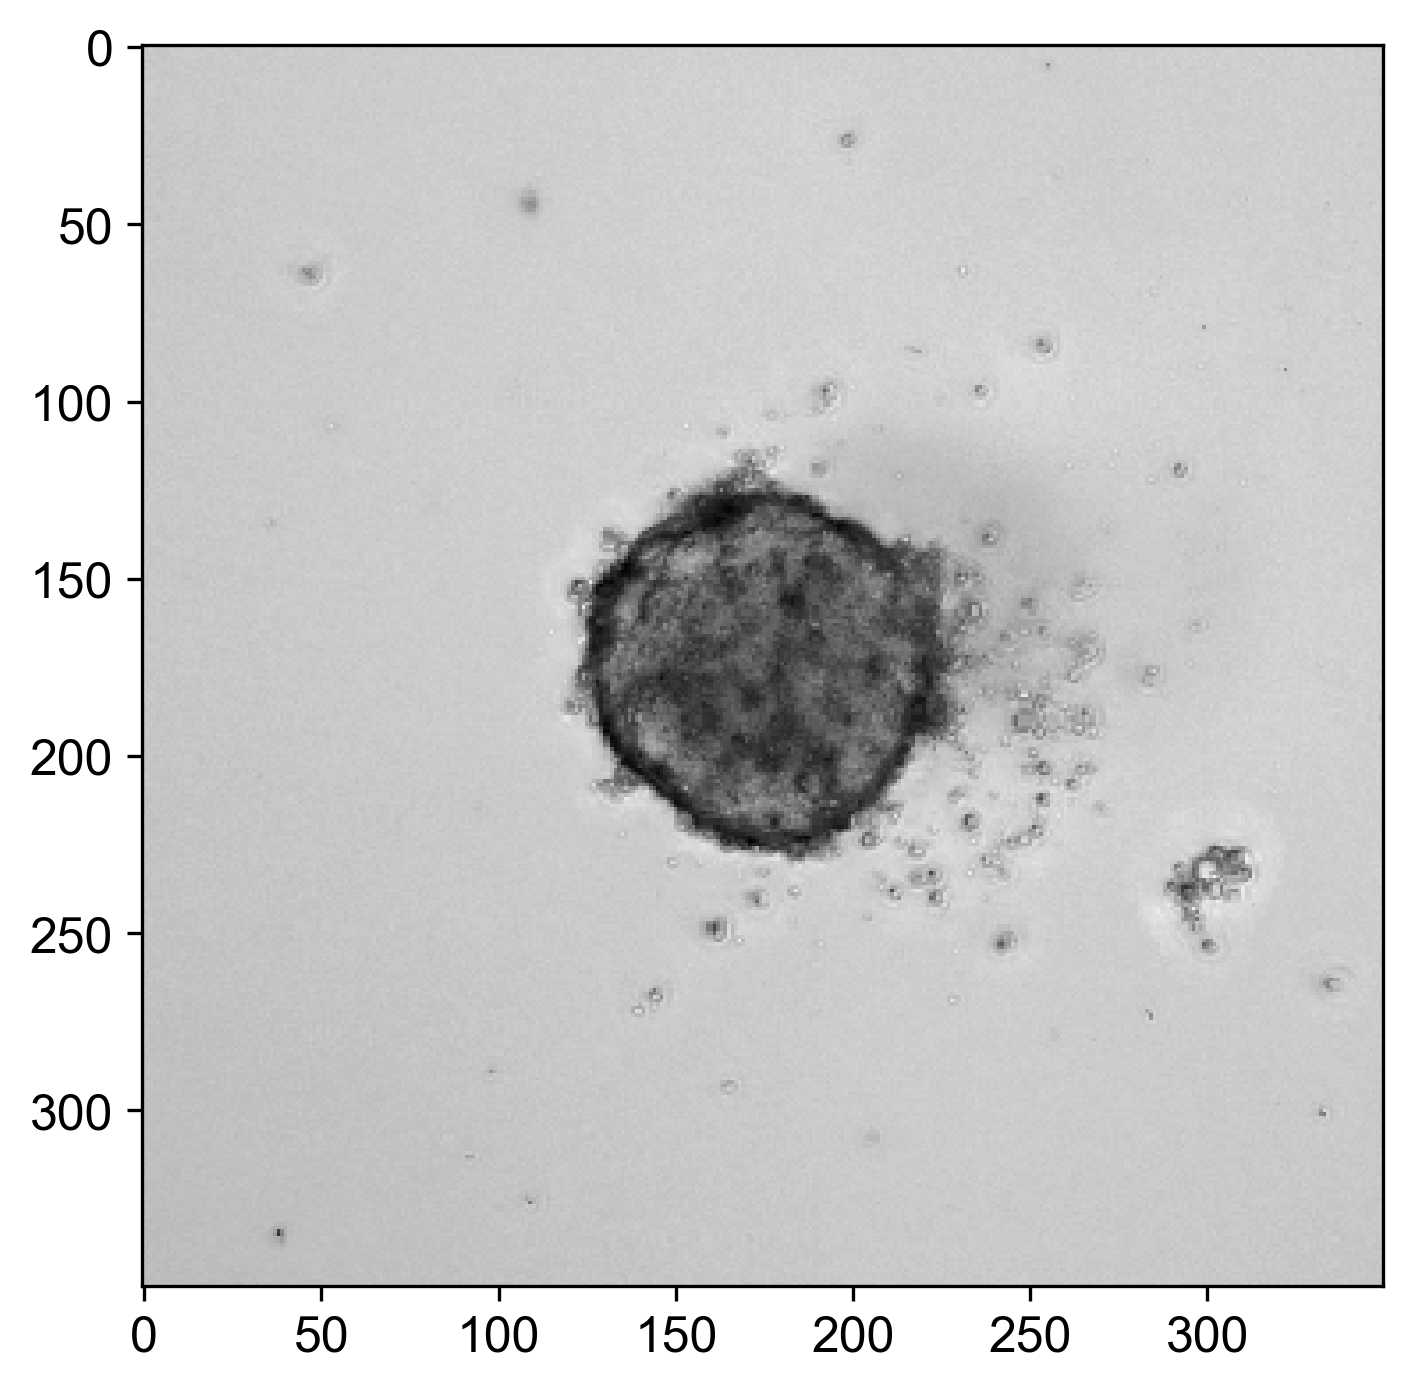

In [9]:
composites = {}
composites[hour] = []
viewer.reset_view()
for i in range(len(cropped_images_bra)):
    viewer.dims.current_step = (i, 175, 175)
    composites[hour].append(viewer.screenshot(size = (600,600))[125:475,125:475])
io.imshow(composites[hour][0])
viewer.layers.clear()

In [10]:
hour = 72

masks_loc = home_directory + f"/image_data/Processed Data/Masks Brightfield/{hour}h"
btf_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brightfield"
bra_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames[hour] =  pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

images = {
    "masks":np.array(mask_collection),
    "btf": np.array(btf_collection),
    "bra": np.array(bra_collection),
}
    
cropped_images_btf = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["btf"],images["masks"])])
cropped_images_bra = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["bra"],images["masks"])])


viewer.add_image(np.array([minmax(crop_img) for crop_img in cropped_images_btf]),name = "BF",)
viewer.add_image(cropped_images_bra,name = "BRA",blending="additive",contrast_limits=[5,80],colormap="red")

<Image layer 'BRA' at 0x2146c7bb8e0>

# ADJUST CONTRAST LIMITS AND OPACITY OF BF IMAGE

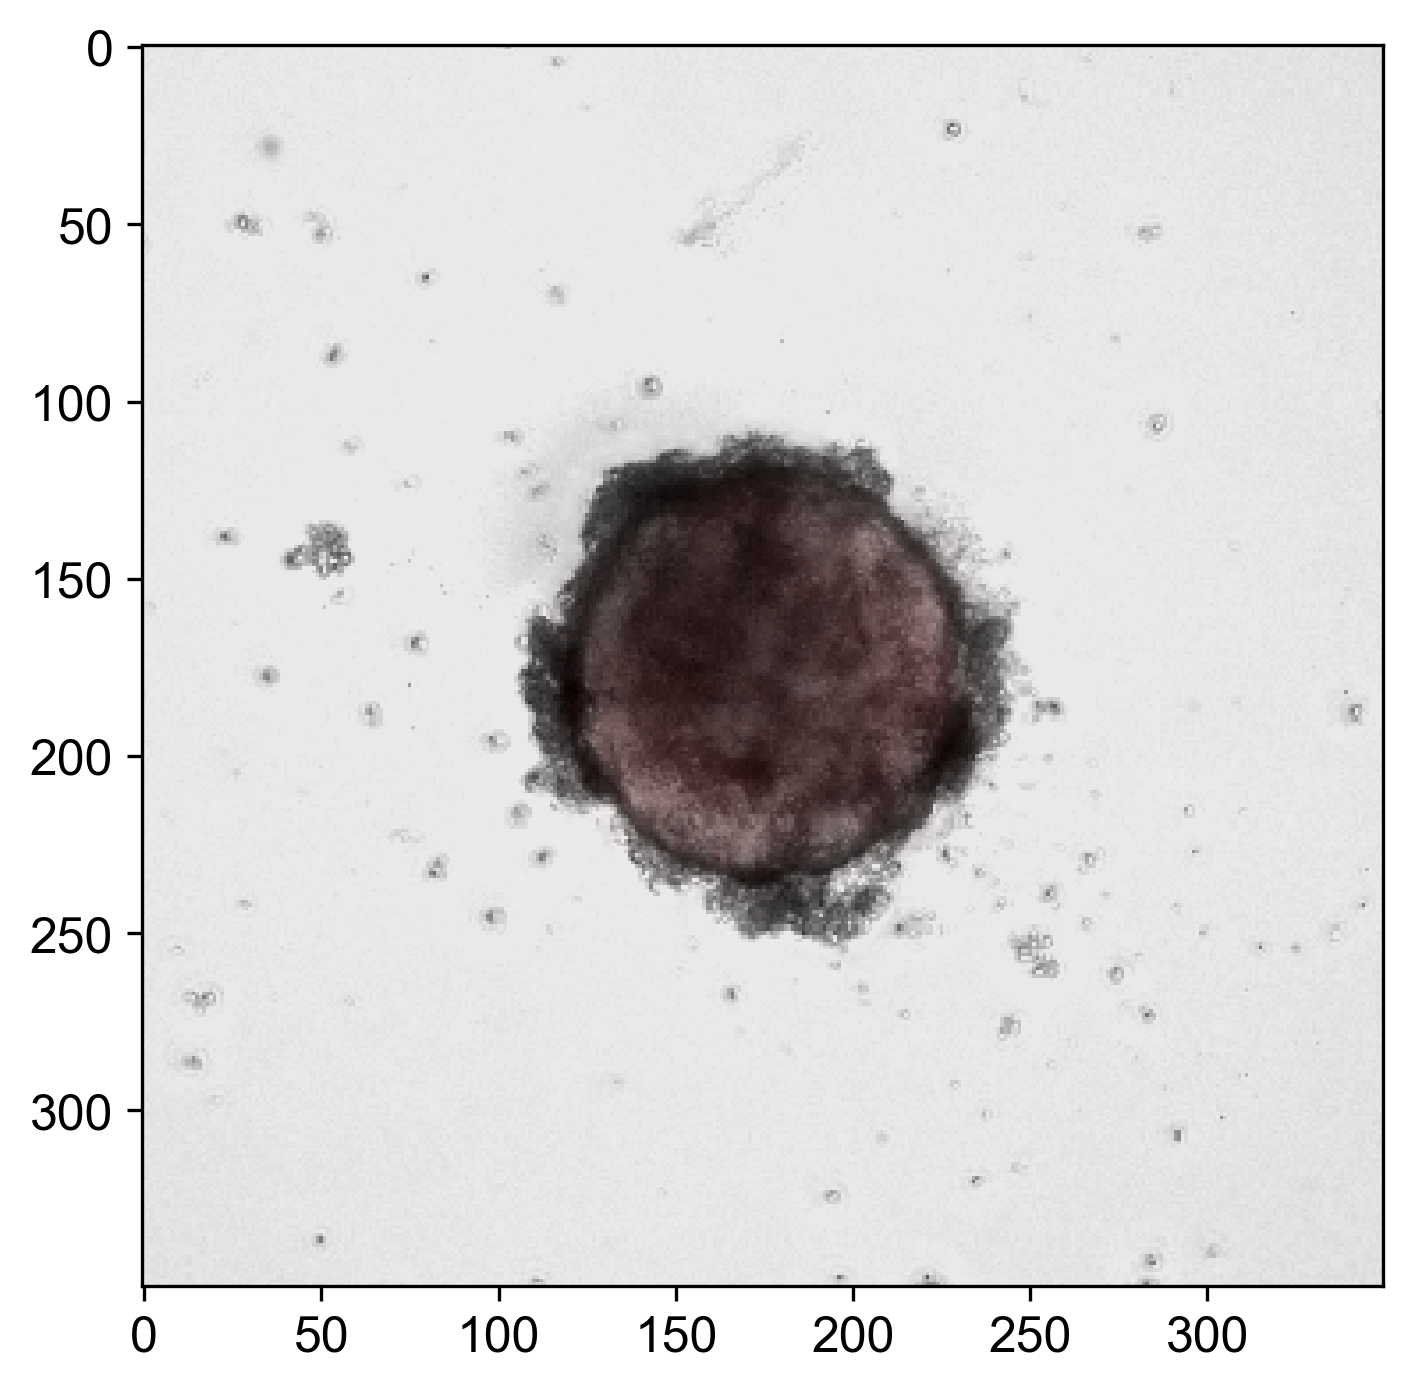

In [11]:
composites[hour] = []
viewer.reset_view()
for i in range(len(cropped_images_bra)):
    viewer.dims.current_step = (i, 175, 175)
    composites[hour].append(viewer.screenshot(size = (600,600))[125:475,125:475])
io.imshow(composites[hour][0])
viewer.layers.clear()

In [12]:
hour = 96

masks_loc = home_directory + f"/image_data/Processed Data/Masks Brightfield/{hour}h"
btf_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brightfield"
bra_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames[hour] = pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

images = {
    "masks":np.array(mask_collection),
    "btf": np.array(btf_collection),
    "bra": np.array(bra_collection),
}

    
cropped_images_btf = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["btf"],images["masks"])])
cropped_images_bra = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["bra"],images["masks"])])

viewer.add_image(np.array([minmax(crop_img) for crop_img in cropped_images_btf]),name = "BF",)
viewer.add_image(cropped_images_bra,name = "BRA",blending="additive",contrast_limits=[5,80],colormap="red")

<Image layer 'BRA' at 0x2141e226880>

# ADJUST CONTRAST LIMITS AND OPACITY OF BF IMAGE

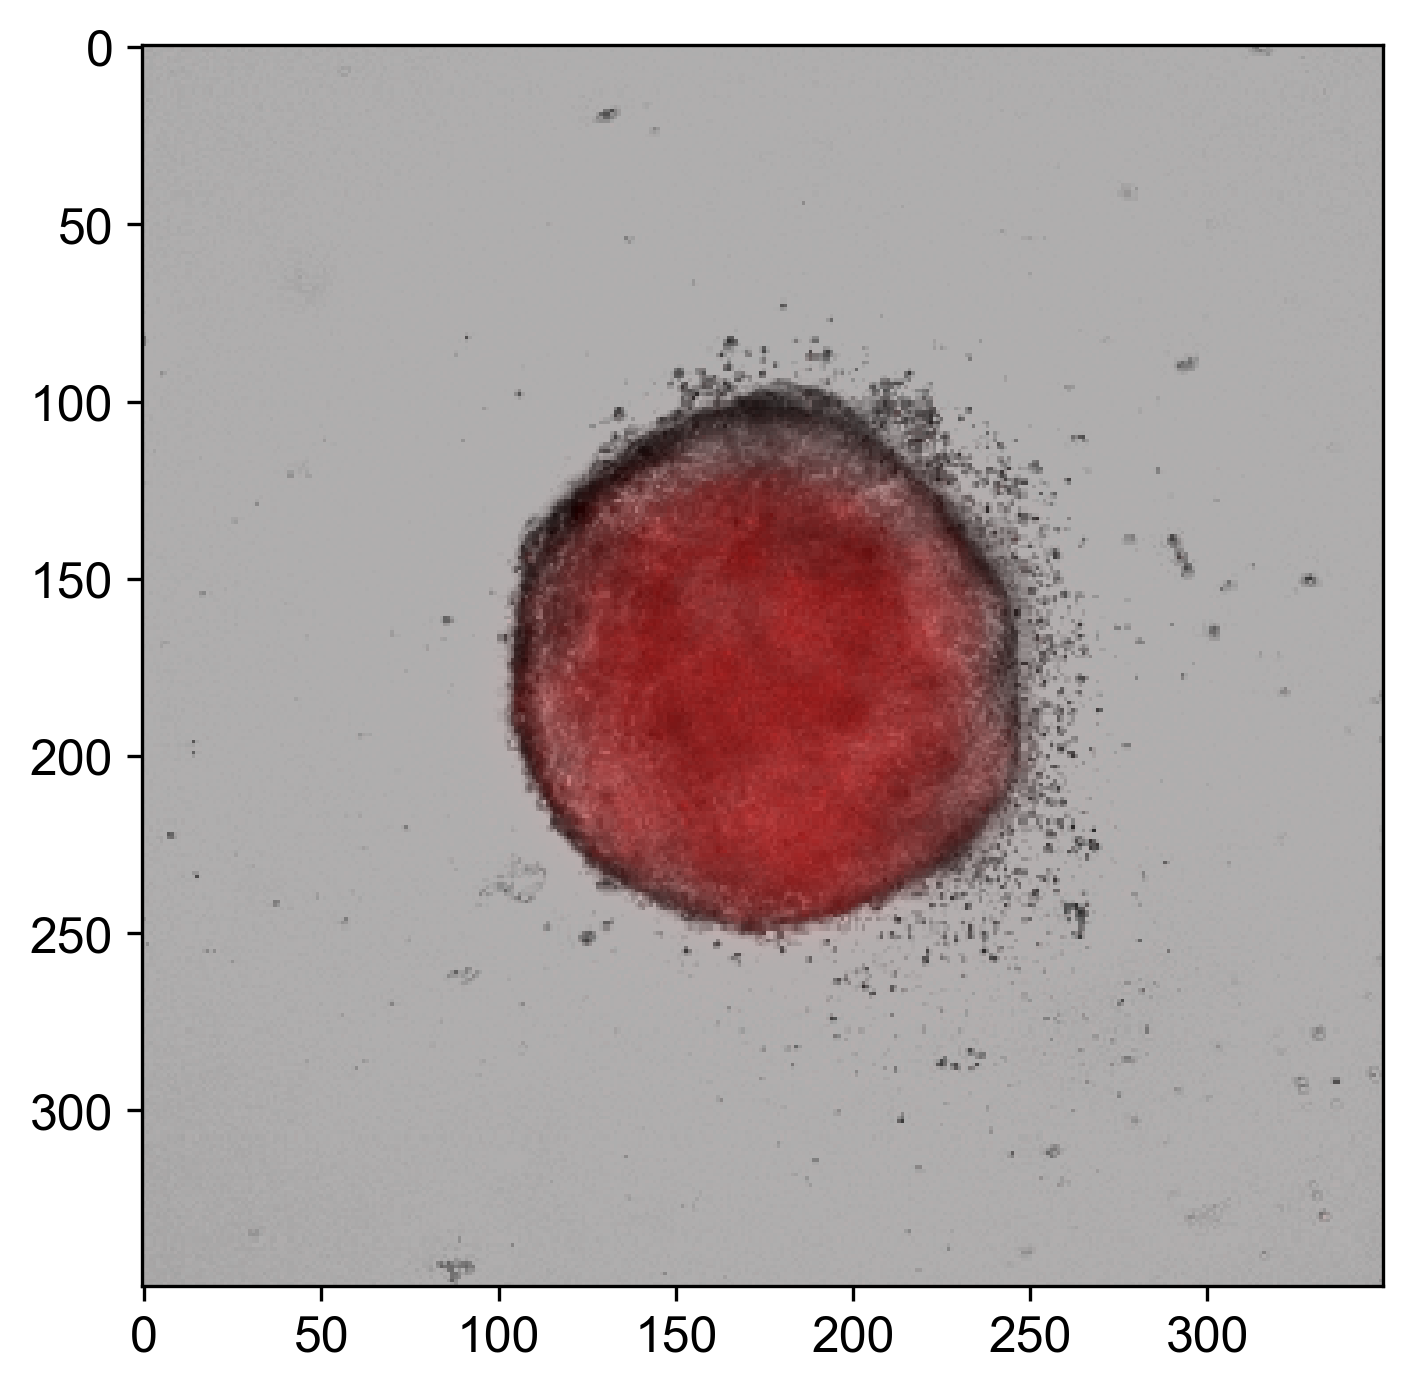

In [13]:
composites[hour] = []
viewer.reset_view()
for i in range(len(cropped_images_bra)):
    viewer.dims.current_step = (i, 175, 175)
    composites[hour].append(viewer.screenshot(size = (600,600))[125:475,125:475])
io.imshow(composites[hour][0])
viewer.layers.clear()

In [22]:
import os

out_folder = home_directory + "/image_data/Processed Data/Composites_Scaled_Across_Timepoints/"
if not(os.path.isdir(out_folder)):
    os.mkdir(out_folder)
    print(f"folder created: {out_folder}")

for hour in [48,72,96]:
    filenames_numpy = filenames[hour].reset_index()[["Run","Plate","ID"]].to_numpy()
          
    for i,image in enumerate(composites[hour]):
        index = filenames_numpy[i]
        name = f"Composite_Run_{index[0]}_Plate_{index[1]}_ID_{index[2]}_Hour_{hour}.tif"
        io.imsave(out_folder+name,image)

folder created: C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation//image_data/Processed Data/Composites_Scaled_Across_Timepoints/


In [3]:
hour = 48

masks_loc = home_directory + f"/image_data/Processed Data/Masks Brightfield/{hour}h"
btf_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brightfield"
bra_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames_2 = {}
filenames_2[hour] = pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

images = {
    "masks":np.array(mask_collection),
    "btf": np.array(btf_collection),
    "bra": np.array(bra_collection),
}

    
cropped_images_btf = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["btf"],images["masks"])])
cropped_images_bra = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["bra"],images["masks"])])


viewer.add_image(np.array([minmax(crop_img) for crop_img in cropped_images_btf]),name = "BF",)
viewer.add_image(cropped_images_bra,name = "BRA",blending="additive",contrast_limits=[5,30],colormap="red")

<Image layer 'BRA' at 0x1a590bf0400>

# ADJUST CONTRAST LIMITS AND OPACITY OF BF IMAGE

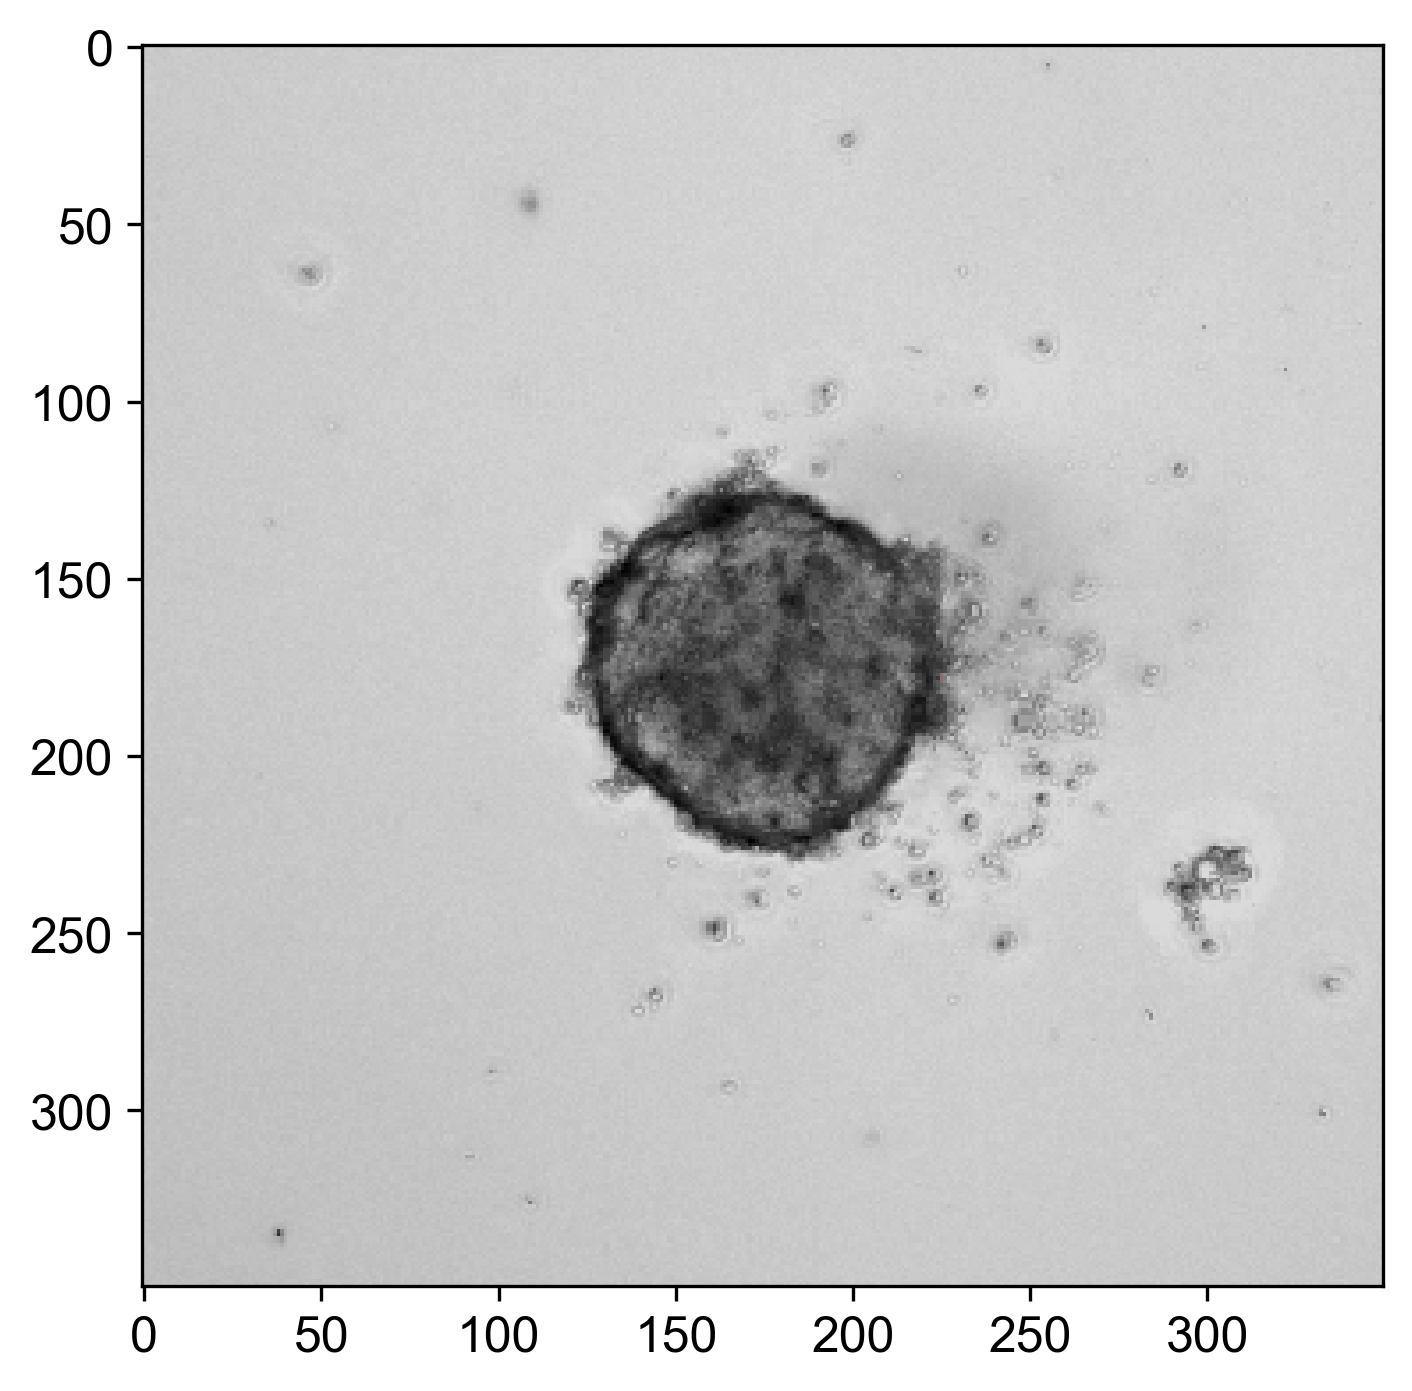

In [4]:
composites_2 = {}
composites_2[hour] = []
viewer.reset_view()
for i in range(len(cropped_images_bra)):
    viewer.dims.current_step = (i, 175, 175)
    composites_2[hour].append(viewer.screenshot(size = (600,600))[125:475,125:475])
io.imshow(composites_2[hour][0])
viewer.layers.clear()

In [5]:
hour = 72

masks_loc = home_directory + f"/image_data/Processed Data/Masks Brightfield/{hour}h"
btf_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brightfield"
bra_loc = home_directory + f"/image_data/Processed Data/Focussed Images/{hour}h/Brachyury"

mask_collection = io.imread_collection(masks_loc+"/*tif")
btf_collection = io.imread_collection(btf_loc+"/*tif")
bra_collection = io.imread_collection(bra_loc+"/*tif")

filenames_2[hour] =  pd.concat([
    opp.extract_sample_identifiers(
        col.files,
        regex=r".*FK223_run_(?P<Run>[A-Z]+)_PLATE_(?P<Plate>[0-9]+)_ID_(?P<ID>[A-Z][0-9]+).*",
        return_original_name=True
    ).set_index(["Run","Plate","ID"]).drop("Filename",axis=1).rename(columns = {"Original Filename":f"{name}filename"}) 
    for name,col in zip(["mask_","btf_","bra_"],[mask_collection,btf_collection,bra_collection])
], axis = 1)

images = {
    "masks":np.array(mask_collection),
    "btf": np.array(btf_collection),
    "bra": np.array(bra_collection),
}
    
cropped_images_btf = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["btf"],images["masks"])])
cropped_images_bra = np.array([opp.crop_image_or_mask_around_CM(img,mask.astype(int),return_image=True,) for img,mask in zip(images["bra"],images["masks"])])


viewer.add_image(np.array([minmax(crop_img) for crop_img in cropped_images_btf]),name = "BF",)
viewer.add_image(cropped_images_bra,name = "BRA",blending="additive",contrast_limits=[5,30],colormap="red")

<Image layer 'BRA' at 0x1a5f628c130>

# ADJUST CONTRAST LIMITS AND OPACITY OF BF IMAGE

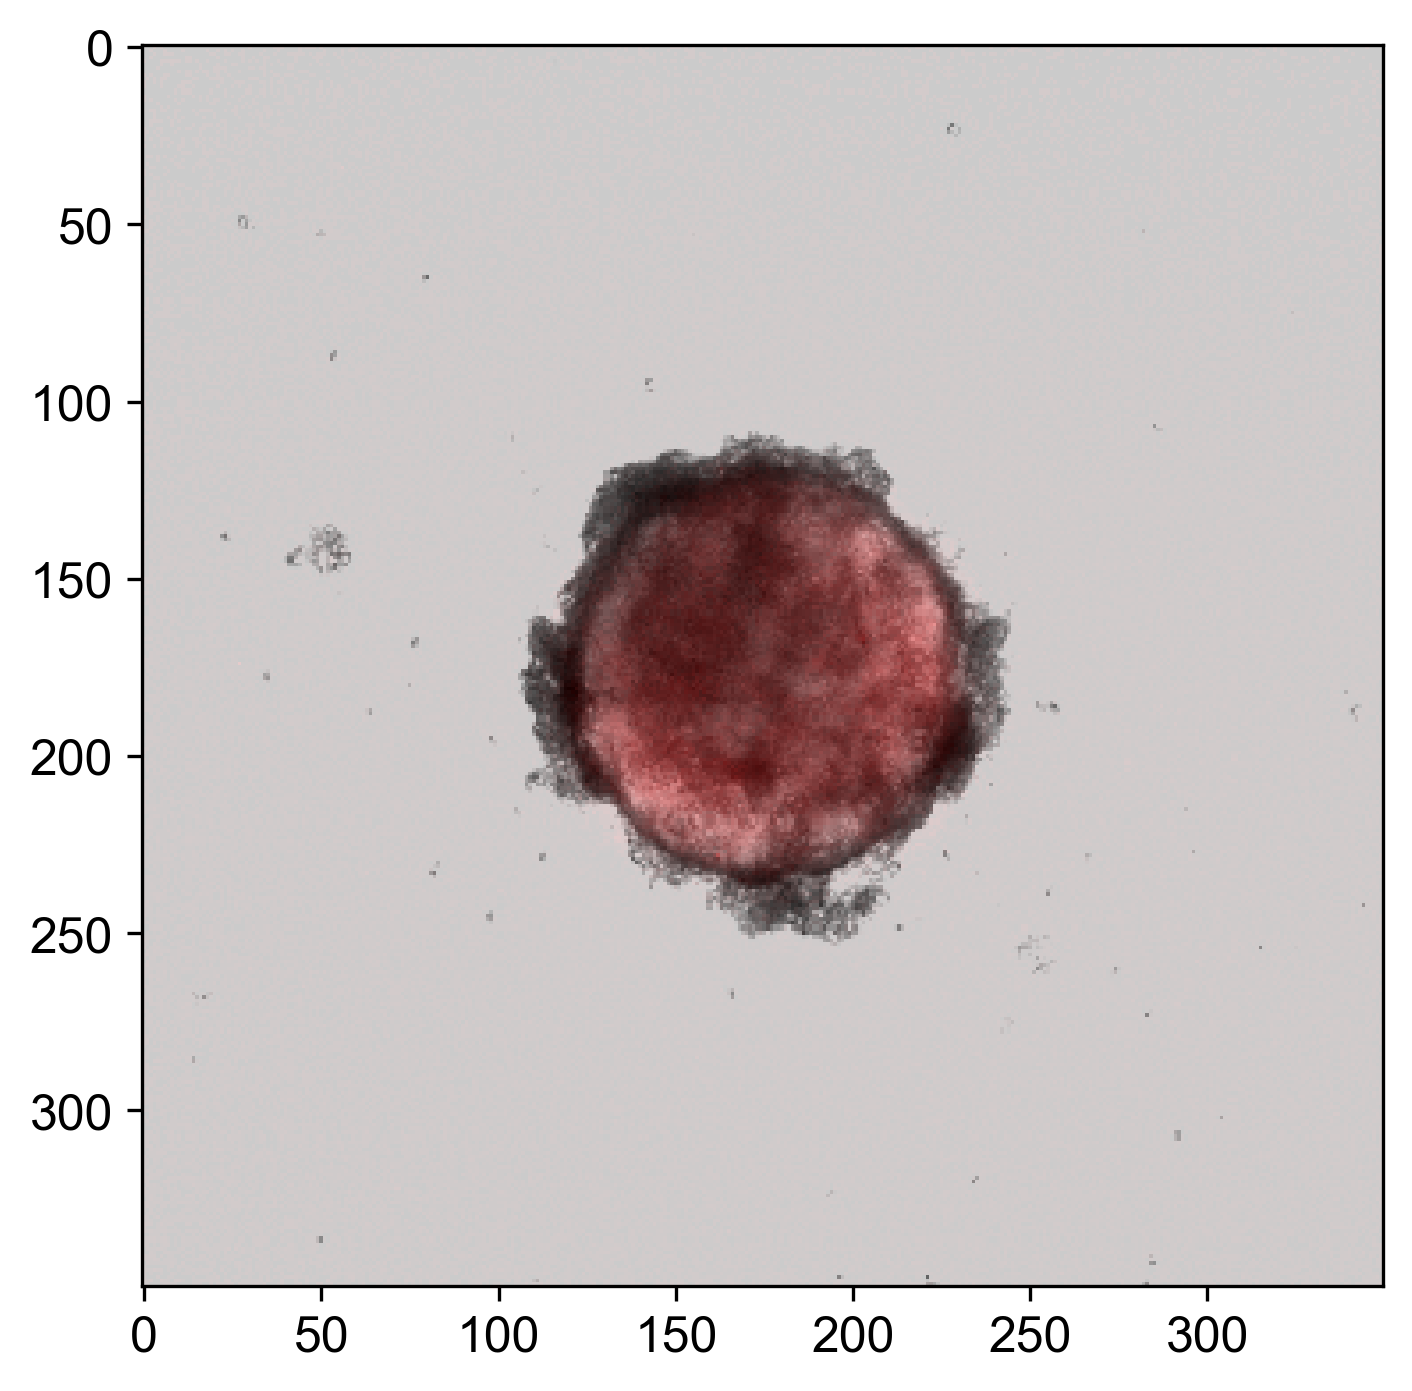

In [6]:
composites_2[hour] = []
viewer.reset_view()
for i in range(len(cropped_images_bra)):
    viewer.dims.current_step = (i, 175, 175)
    composites_2[hour].append(viewer.screenshot(size = (600,600))[125:475,125:475])
io.imshow(composites_2[hour][0])
viewer.layers.clear()

In [8]:
import os

out_folder_2 = home_directory + "/image_data/Processed Data/Composites_Scaled_Across_48h-72h/"
if not(os.path.isdir(out_folder_2)):
    os.mkdir(out_folder_2)
    print(f"folder created: {out_folder_2}")

for hour in [48,72]:
    filenames_numpy = filenames_2[hour].reset_index()[["Run","Plate","ID"]].to_numpy()
          
    for i,image in enumerate(composites_2[hour]):
        index = filenames_numpy[i]
        name = f"Composite_Run_{index[0]}_Plate_{index[1]}_ID_{index[2]}_Hour_{hour}.tif"
        io.imsave(out_folder_2+name,image)

folder created: C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation//image_data/Processed Data/Composites_Scaled_Across_48h-72h/
